In [177]:
from glob import glob
from math import sqrt
import pandas as pd
import numpy as np
import os
import torch
import torch.nn.functional as F
from rdkit import Chem
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white', font_scale=2)

In [178]:
csvs = glob('./emb_results_*/*/lii.csv')
res = []
for csv in csvs:
    df = pd.read_csv(csv)
    df['epoch'] = csv.split('/')[-3].split('_')[-1]
    res.append(df)
df = pd.concat(res)

df.to_csv('LII_results.csv')
df_train = df[df.group == 'train']
df_test = df[df.group == 'test']


/tmp/ipykernel_28196/1856975099.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd['epoch'] = pd.Categorical(dfd['epoch'], categories=order, ordered=True)


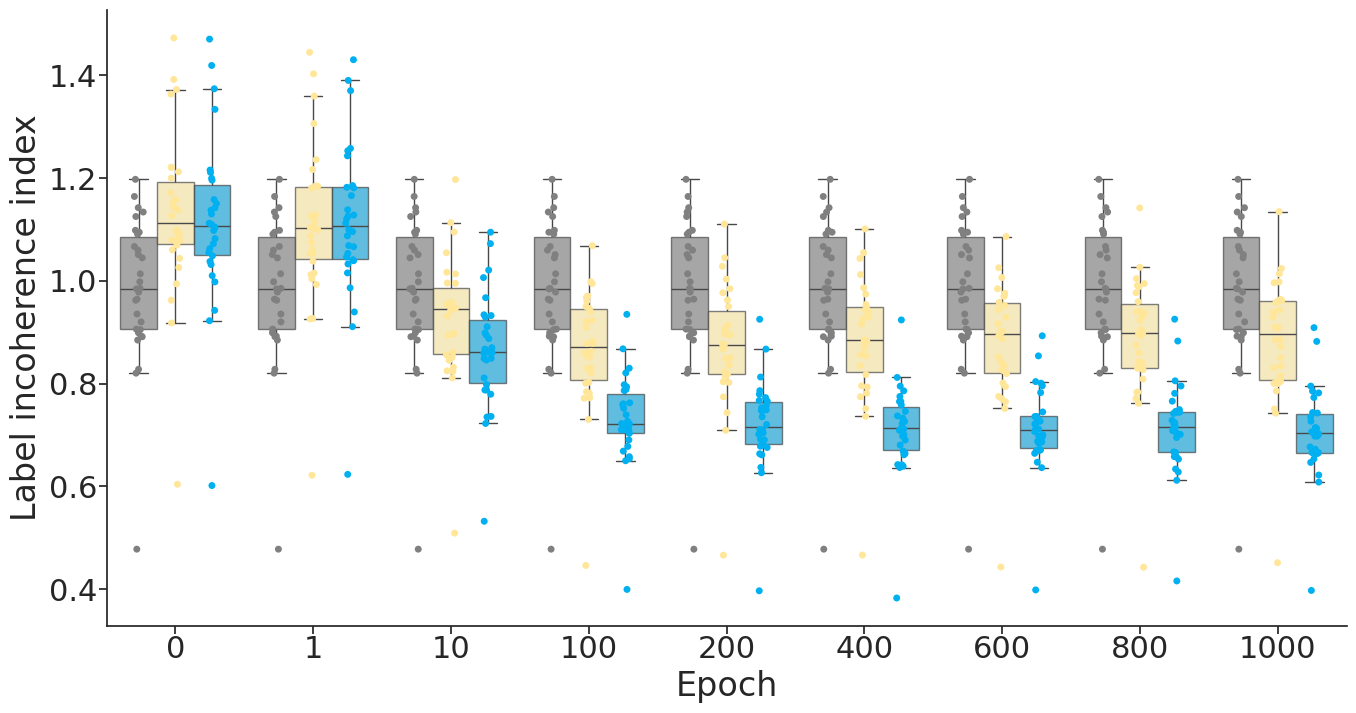

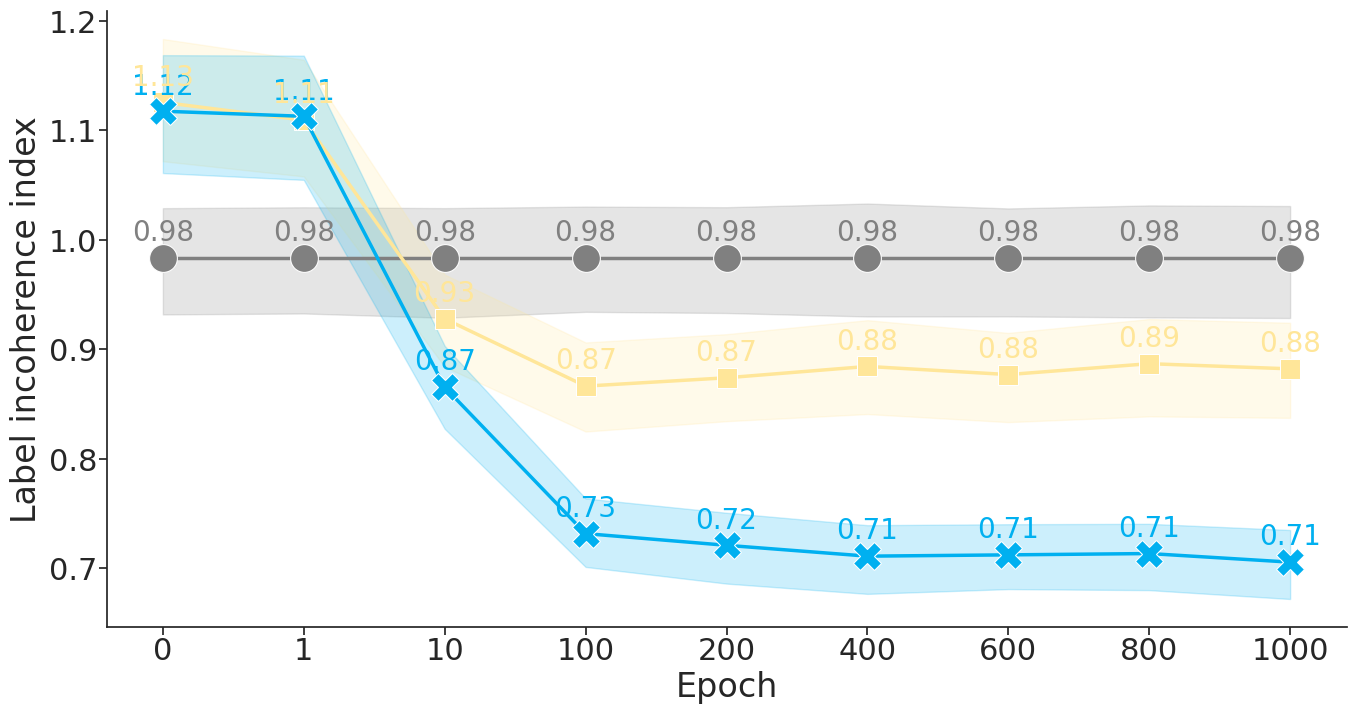

In [179]:
dfd = df_test

palette = ['grey', '#FFE699','#00B0F0'] #
hue_order = ['structure', 'latent:wo_aca', 'latent:wi_aca']
order = ['0','1',   '10', '100', '200', '400', '600', '800', '1000']


fig, ax = plt.subplots(figsize=(16, 8))
sns.stripplot(data=dfd, y = 'lii', x = 'epoch', 
            hue = 'method', order = order, dodge=True,
            hue_order = hue_order, ax=ax, #fliersize=0,
            palette=palette)


sns.boxplot(data=dfd, y = 'lii', x = 'epoch', 
            hue = 'method', order = order, 
            hue_order = hue_order, ax=ax,fliersize=0,
            palette=palette)

for patch in ax.patches:
    patch.set_alpha(0.7)  # 0.0 (完全透明) ~ 1.0 (完全不透明)
    
ax.legend_.remove()
ax.set_ylabel('Label incoherence index')
ax.set_xlabel('Epoch')
#ax.tick_params(axis='x', rotation=90)  # 旋转 x 轴标签
ax.tick_params(left='off', labelleft='on', labelbottom='on', bottom = 'off',  pad=.8,)
ax.spines[['right', 'top']].set_visible(False)
fig.savefig('./results/test_epoch_all_boxplot.svg', bbox_inches='tight', dpi=400) 
fig.savefig('./results/test_epoch_all_boxplot.pdf', bbox_inches='tight', dpi=400) 


fig, ax = plt.subplots(figsize=(16, 8))
dfd['epoch'] = pd.Categorical(dfd['epoch'], categories=order, ordered=True)
sns.lineplot(data=dfd, y = 'lii', x = 'epoch', 
            hue = 'method',style='method',
            hue_order = hue_order, ax=ax,
            markers=True,
            dashes=False,  #err_kws={'alpha': 0.5},
            lw = 2.5, markersize=20,
            palette=palette)


ax.set_ylabel('Label incoherence index')
ax.set_xlabel('Epoch')
#ax.tick_params(axis='x', rotation=90)  # 旋转 x 轴标签

means = (
    dfd
    .groupby(['epoch','method'], observed=True)['lii']
    .mean()
    .reset_index()
)

# 3) 建立 epoch 字符 -> x 坐标 索引 映射
#    seaborn 默认把第一个 category 放在 x=0, 第二个在 x=1，以此类推
epoch_to_x = {cat: i for i, cat in enumerate(order)}

# 4) method->颜色 映射
color_mapping = dict(zip(hue_order, palette))

# 5) 在每个平均点上标注
for _, row in means.iterrows():
    x = epoch_to_x[row['epoch']]
    y = row['lii']
    ax.annotate(
        f"{y:.2f}",
        xy=(x, y),
        xytext=(0, 8),           # 文本往上偏移 8 个像素
        textcoords='offset points',
        ha='center',             # 横向居中
        va='bottom',
        fontsize=20,
        color=color_mapping[row['method']]
    )
ax.legend_.remove()
#ax.set_ylim(0.6, 1.2)
ax.tick_params(left='off', labelleft='on', labelbottom='on', bottom = 'off',  pad=.8,)
ax.spines[['right', 'top']].set_visible(False)
fig.savefig('./results/test_epoch_all_linplot.svg', bbox_inches='tight', dpi=400) 
fig.savefig('./results/test_epoch_all_linplot.pdf', bbox_inches='tight', dpi=400) 


/tmp/ipykernel_28196/2149163392.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd['epoch'] = pd.Categorical(dfd['epoch'], categories=order, ordered=True)


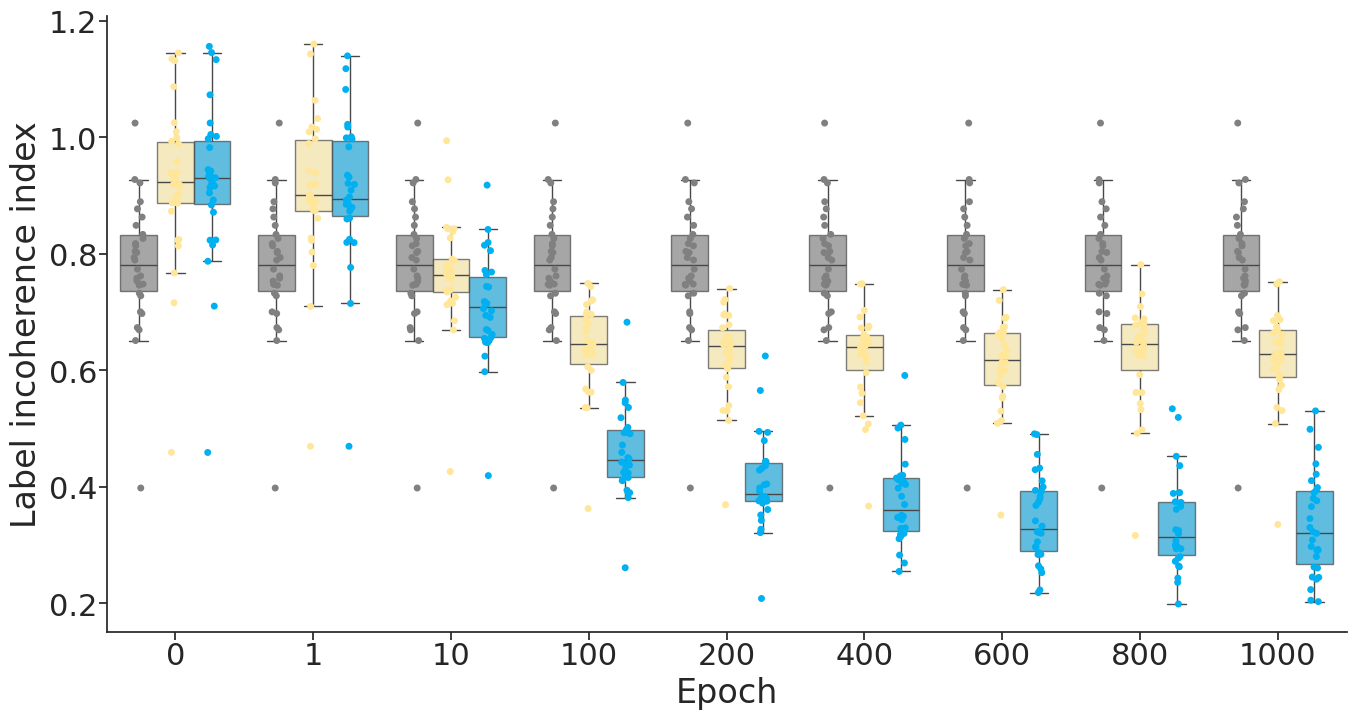

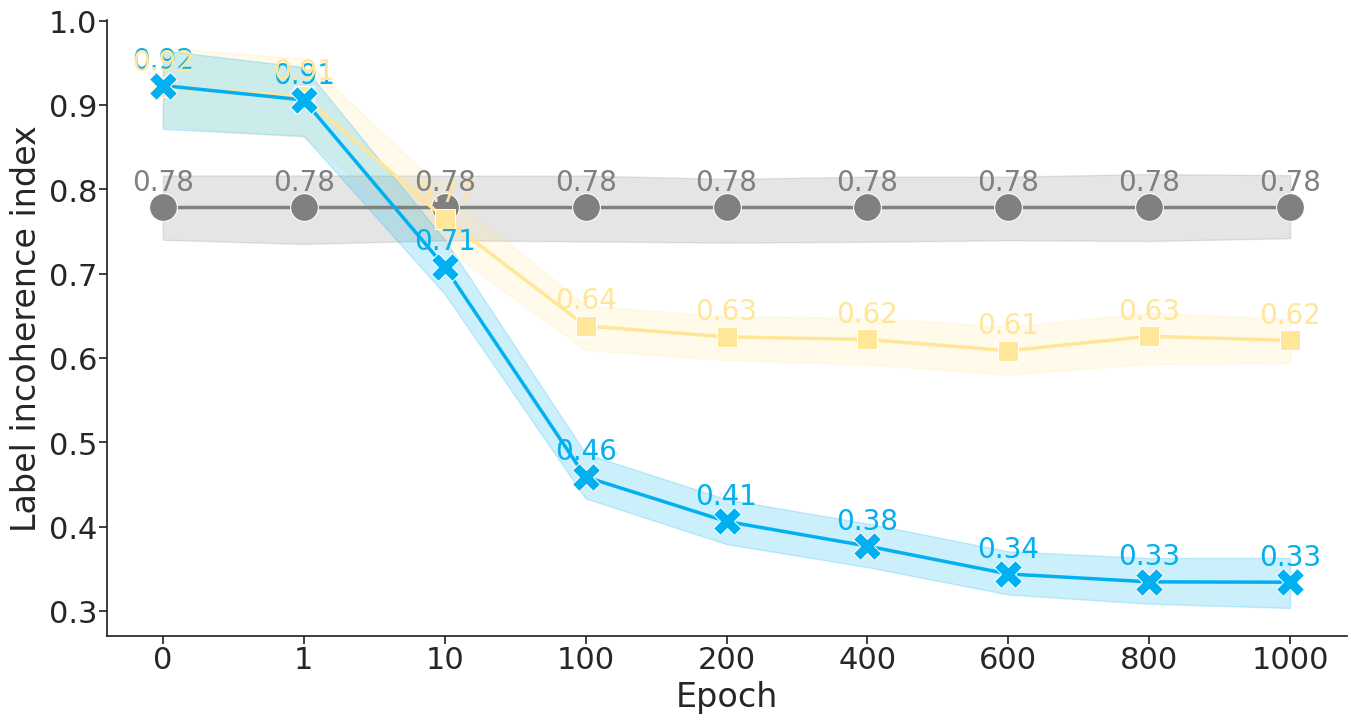

In [180]:
dfd = df_train

fig, ax = plt.subplots(figsize=(16, 8))

sns.stripplot(data=dfd, y = 'lii', x = 'epoch', 
            hue = 'method', order = order, dodge=True,
            hue_order = hue_order, ax=ax, #fliersize=0,
            palette=palette)


sns.boxplot(data=dfd, y = 'lii', x = 'epoch', 
            hue = 'method', order = order,
            hue_order = hue_order, ax=ax,fliersize=0,
            palette=palette)


for patch in ax.patches:
    patch.set_alpha(0.7)  # 0.0 (完全透明) ~ 1.0 (完全不透明)


ax.set_ylabel('Label incoherence index')
ax.set_xlabel('Epoch')
ax.legend_.remove()
ax.tick_params(left='off', labelleft='on', labelbottom='on', bottom = 'off',  pad=.8,)
ax.spines[['right', 'top']].set_visible(False)
fig.savefig('./results/train_epoch_all_boxplot.svg', bbox_inches='tight', dpi=400) 
fig.savefig('./results/train_epoch_all_boxplot.pdf', bbox_inches='tight', dpi=400) 



fig, ax = plt.subplots(figsize=(16, 8))

dfd['epoch'] = pd.Categorical(dfd['epoch'], categories=order, ordered=True)


sns.lineplot(data=dfd, y = 'lii', x = 'epoch', 
            hue = 'method',style='method',
            hue_order = hue_order, ax=ax,
            markers=True,
            dashes=False, #err_kws={'alpha': 0.4},
            lw = 2.5, markersize=20,
            palette=palette)


ax.set_ylabel('Label incoherence index')
ax.set_xlabel('Epoch')
#ax.tick_params(axis='x', rotation=90)  # 旋转 x 轴标签

means = (
    dfd
    .groupby(['epoch','method'], observed=True)['lii']
    .mean()
    .reset_index()
)

# 3) 建立 epoch 字符 -> x 坐标 索引 映射
#    seaborn 默认把第一个 category 放在 x=0, 第二个在 x=1，以此类推
epoch_to_x = {cat: i for i, cat in enumerate(order)}

# 4) method->颜色 映射
color_mapping = dict(zip(hue_order, palette))

# 5) 在每个平均点上标注
for _, row in means.iterrows():
    x = epoch_to_x[row['epoch']]
    y = row['lii']
    ax.annotate(
        f"{y:.2f}",
        xy=(x, y),
        xytext=(0, 8),           # 文本往上偏移 8 个像素
        textcoords='offset points',
        ha='center',             # 横向居中
        va='bottom',
        fontsize=20,
        color=color_mapping[row['method']]
    )
ax.legend_.remove()
#ax.set_ylim(0.25, 1.2)
ax.tick_params(left='off', labelleft='on', labelbottom='on', bottom = 'off',  pad=.8,)
ax.spines[['right', 'top']].set_visible(False)
fig.savefig('./results/train_epoch_all_lineplot.svg', bbox_inches='tight', dpi=400) 
fig.savefig('./results/train_epoch_all_lineplot.pdf', bbox_inches='tight', dpi=400) 


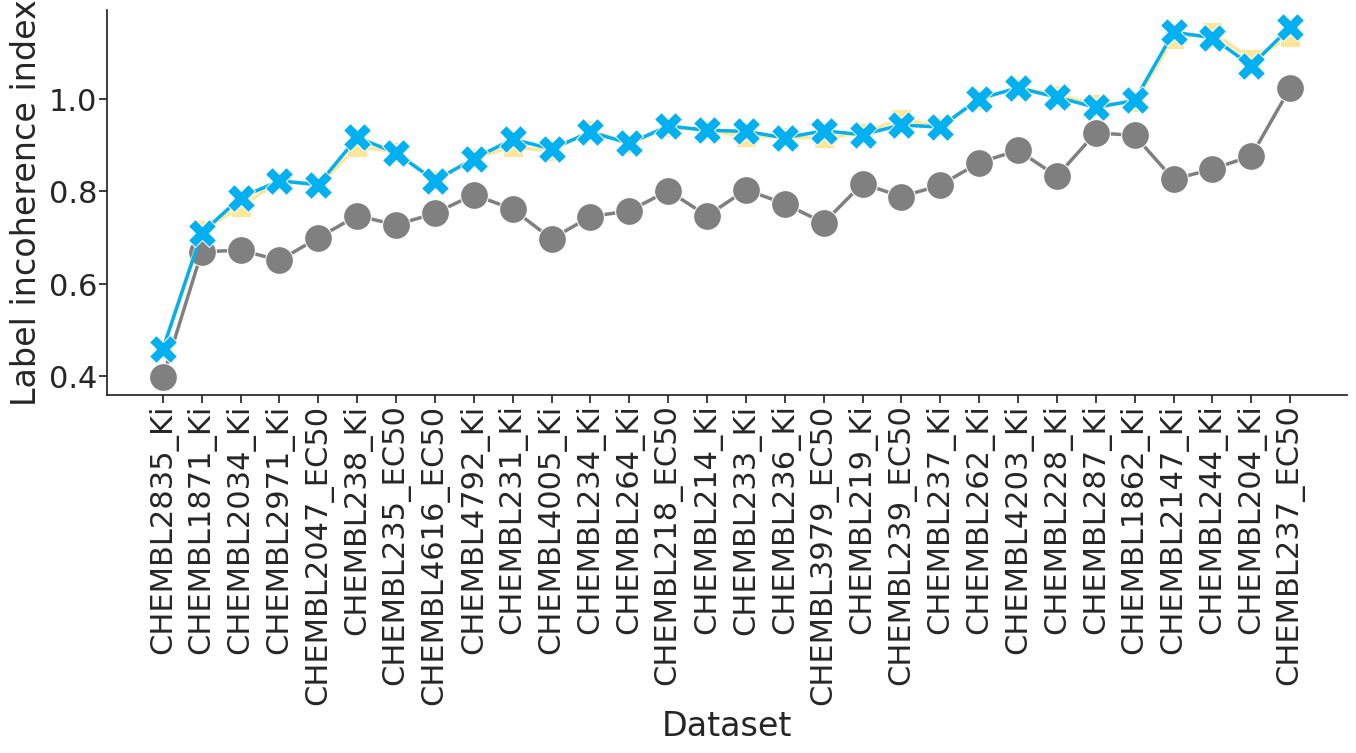

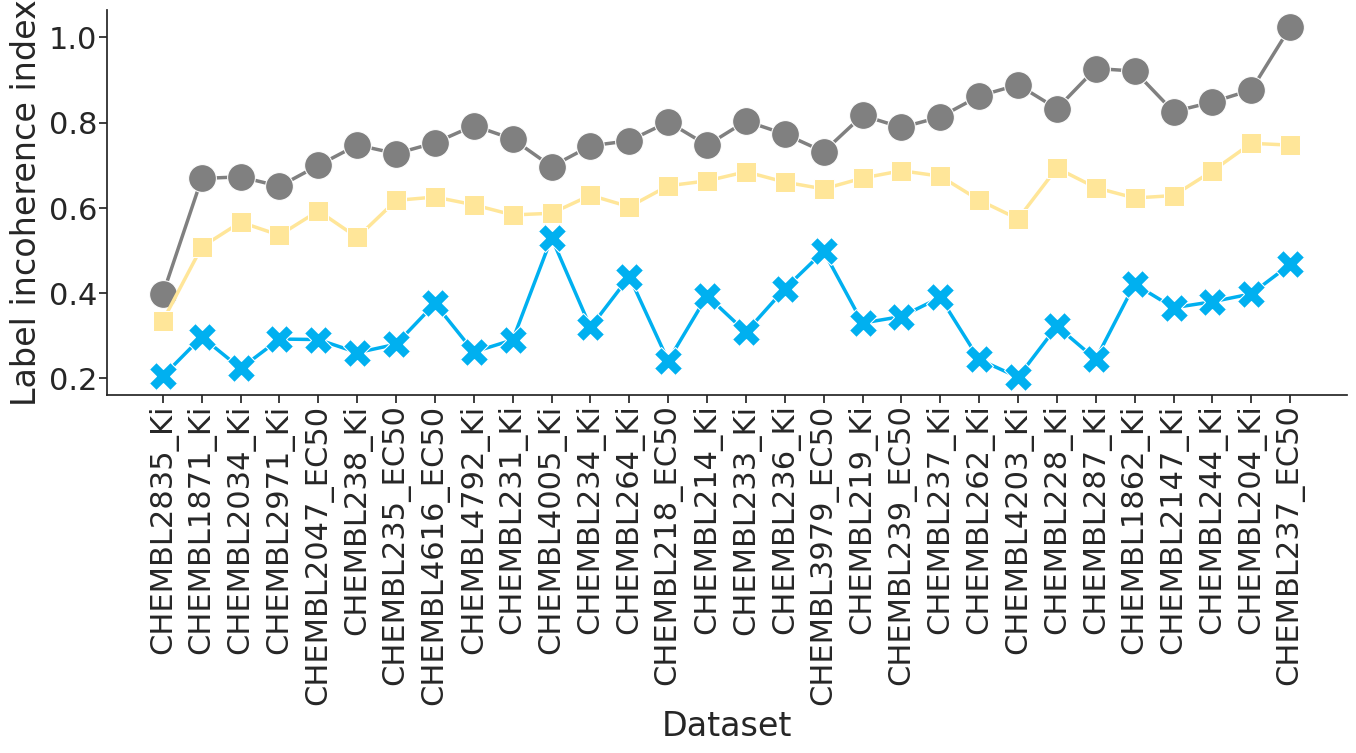

In [181]:
dfd = df[df.group == 'train']
df0 = dfd[dfd.epoch == '0']
df1000 = dfd[dfd.epoch == '1000']

order = pd.concat([df0,df1000]).groupby('dataset').lii.mean().sort_values().index

for dfd, name in zip([df0, df1000], [0, 1000]):
    
    #order = dfd.groupby('dataset').lii.mean().sort_values().index
    dfd['dataset'] = pd.Categorical(dfd['dataset'], categories=order, ordered=True)

    fig, ax = plt.subplots(figsize=(16, 5))
    
    sns.lineplot(
        data=dfd,
        x='dataset',
        y='lii',
        hue='method',
        hue_order=hue_order,
        style='method',
        palette=palette,
        markers=True,
        dashes=False, lw = 2.5, markersize=20,
        ax=ax
    )
    
    ax.set_ylabel('Label incoherence index')
    ax.set_xlabel('Dataset')
    ax.tick_params(axis='x', rotation=90)  # 旋转 x 轴标签
    ax.legend_.remove()
    #ax.set_ylim(0.1, 1.2)
    # 可选：加紧凑排版避免标签重叠
    ax.tick_params(left='off', labelleft='on', labelbottom='on', bottom = 'off',  pad=.8,)
    ax.spines[['right', 'top']].set_visible(False)
    fig.savefig('./results/train_epoch_%s_lineplot.svg' % name, bbox_inches='tight', dpi=400) 
    fig.savefig('./results/train_epoch_%s_lineplot.pdf' % name, bbox_inches='tight', dpi=400) 

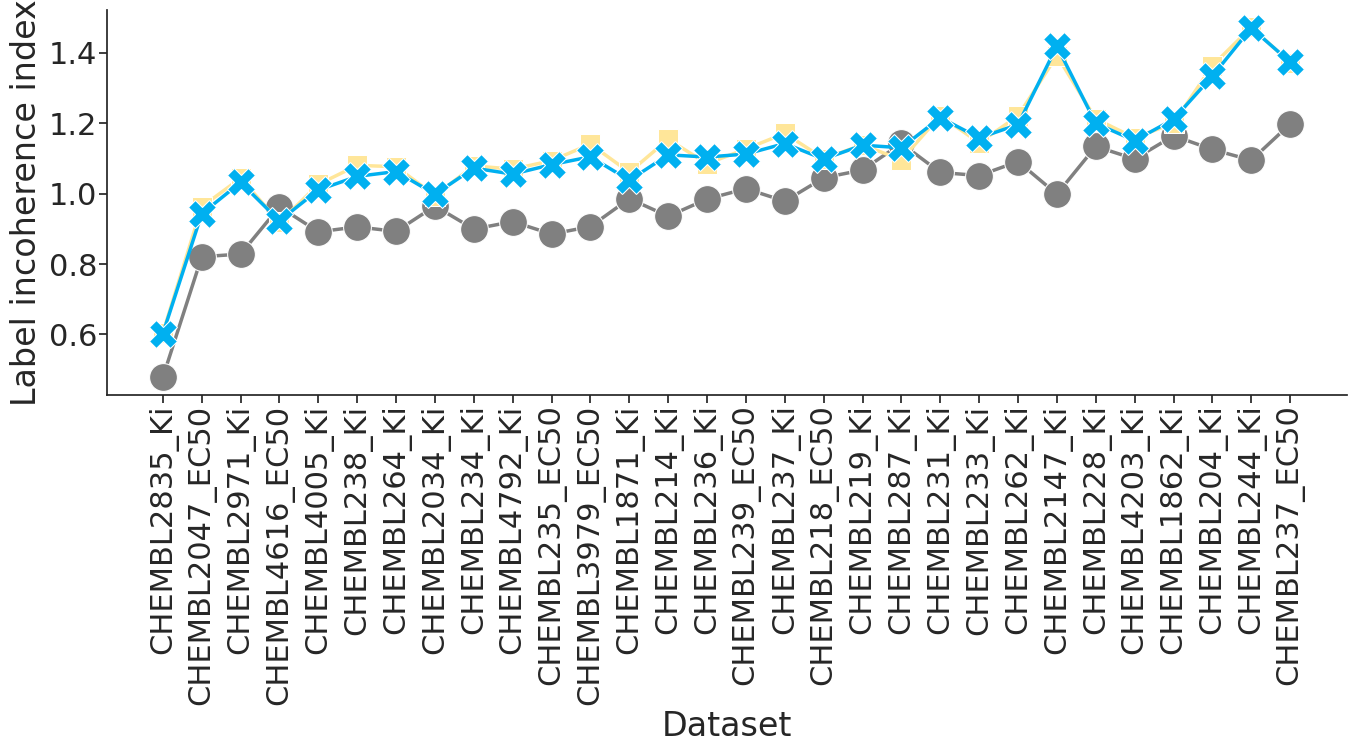

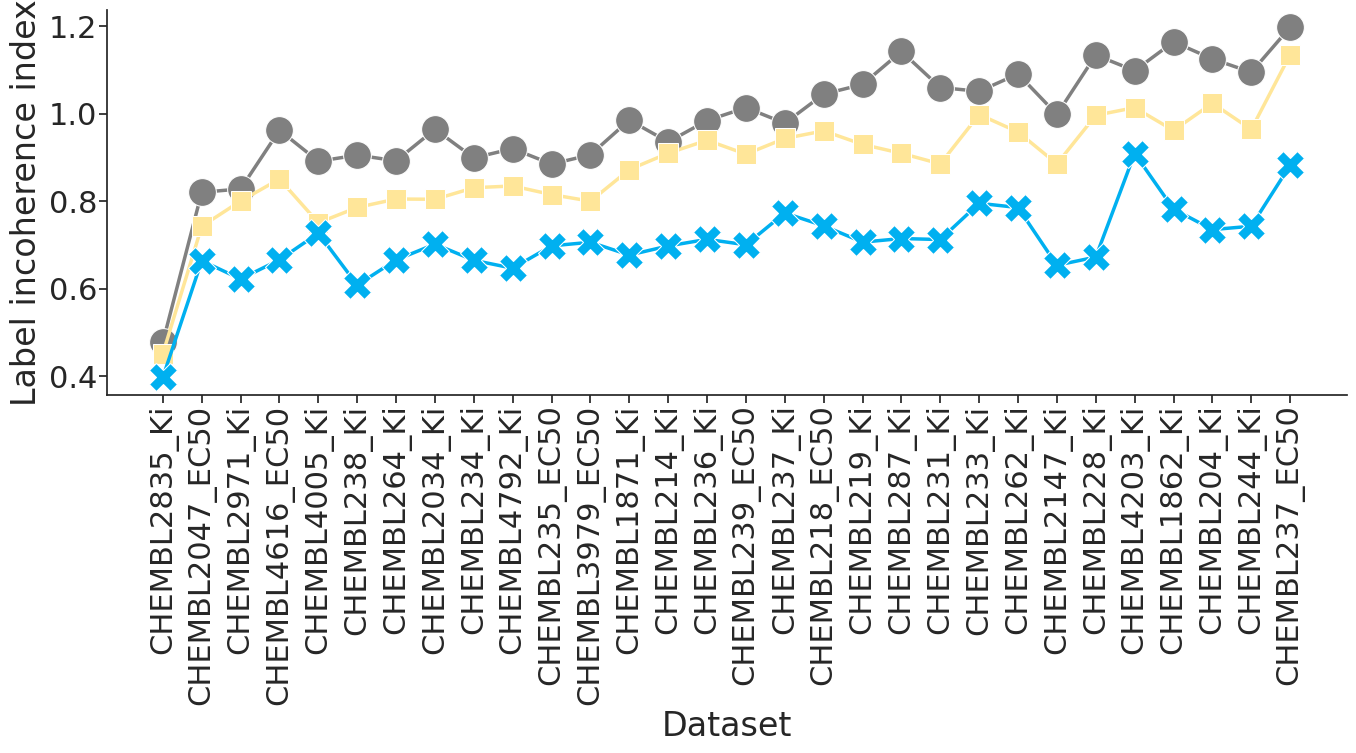

In [182]:
dfd = df[df.group == 'test']
df0 = dfd[dfd.epoch == '0']
df1000 = dfd[dfd.epoch == '1000']

order = pd.concat([df0,df1000]).groupby('dataset').lii.mean().sort_values().index

for dfd, name in zip([df0, df1000], [0, 1000]):
    dfd['dataset'] = pd.Categorical(dfd['dataset'], categories=order, ordered=True)
    fig, ax = plt.subplots(figsize=(16, 5))
    
    sns.lineplot(
        data=dfd,
        x='dataset',
        y='lii',
        hue='method',
        hue_order=hue_order,
        style='method',
        palette=palette,
        markers=True,
        dashes=False, lw = 2.5, markersize=20,
        ax=ax
    )
    
    ax.set_ylabel('Label incoherence index')
    ax.set_xlabel('Dataset')
    ax.tick_params(axis='x', rotation=90)  # 旋转 x 轴标签
    ax.legend_.remove()
    #ax.set_ylim(0.3, 1.5)
    # 可选：加紧凑排版避免标签重叠
    ax.tick_params(left='off', labelleft='on', labelbottom='on', bottom = 'off',  pad=.8,)
    ax.spines[['right', 'top']].set_visible(False)
    fig.savefig('./results/test_epoch_%s_lineplot.svg' % name, bbox_inches='tight', dpi=400) 
    fig.savefig('./results/test_epoch_%s_lineplot.pdf' % name, bbox_inches='tight', dpi=400) 

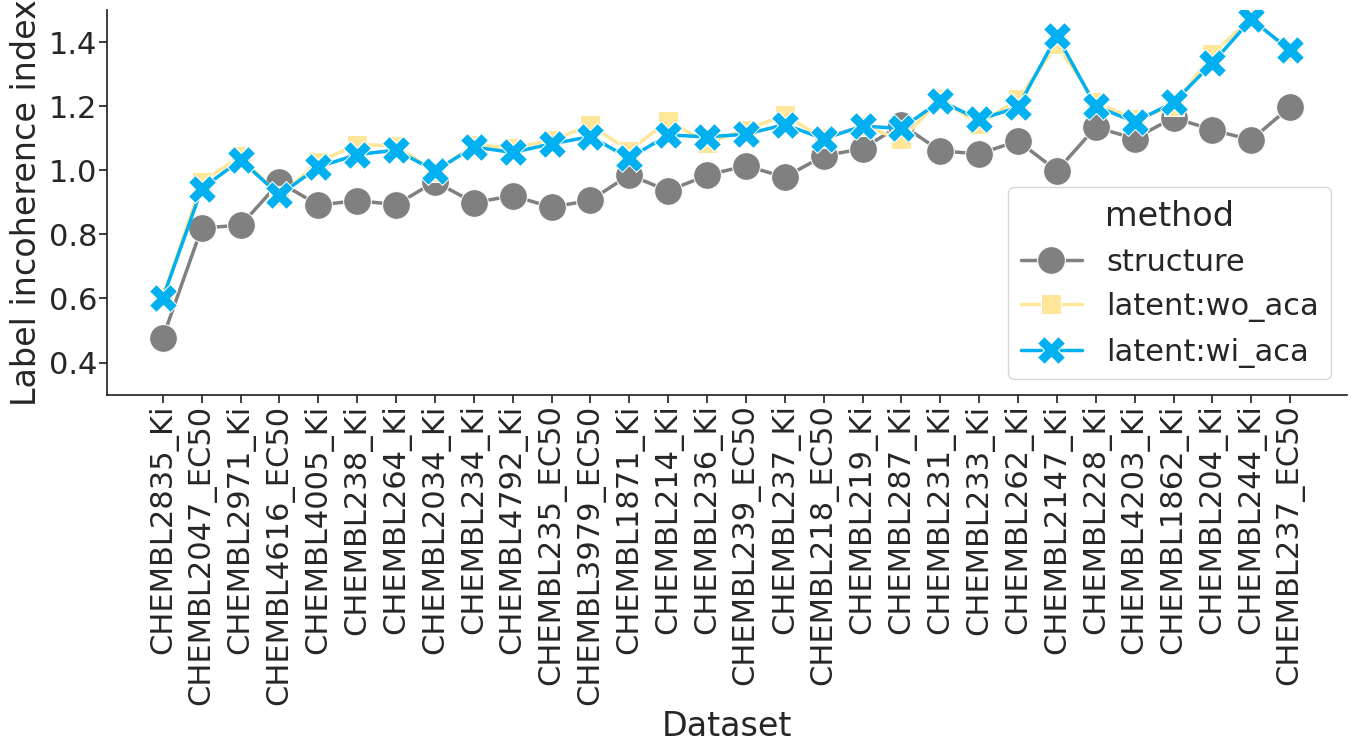

In [183]:
dfd = df[df.group == 'test']
df0 = dfd[dfd.epoch == '0']
df1000 = dfd[dfd.epoch == '1000']

order = pd.concat([df0,df1000]).groupby('dataset').lii.mean().sort_values().index

for dfd, name in zip([df0], [0]):
    dfd['dataset'] = pd.Categorical(dfd['dataset'], categories=order, ordered=True)
    fig, ax = plt.subplots(figsize=(16, 5))
    
    sns.lineplot(
        data=dfd,
        x='dataset',
        y='lii',
        hue='method',
        hue_order=hue_order,
        style='method',
        palette=palette,
        markers=True,
        dashes=False, lw = 2.5, markersize=20,
        ax=ax
    )
    
    ax.set_ylabel('Label incoherence index')
    ax.set_xlabel('Dataset')
    ax.tick_params(axis='x', rotation=90)  # 旋转 x 轴标签
    #ax.legend_.remove()
    ax.set_ylim(0.3, 1.5)
    # 可选：加紧凑排版避免标签重叠
    ax.tick_params(left='off', labelleft='on', labelbottom='on', bottom = 'off',  pad=.8,)
    ax.spines[['right', 'top']].set_visible(False)
 
    fig.savefig('./results/legend.pdf', bbox_inches='tight', dpi=400) 